# Pandas and Matplotlib Tutorial

In [74]:
# Standard Headers
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## 1. Intro to Pandas

Pandas provide two convenient data structures for storing and manipulating data-- Series and DataFrame. A Series is similar to a one-dimensional array whereas a DataFrame is more similar to representing a matrix or a spreadsheet table.  

The Pandas library documentation is [here](http://pandas.pydata.org/pandas-docs/stable/reference/index.html).

In this tutorial, we will use the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolor, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolor, Virginica) 

<img src="iris.png">

### 1.1 Reading data from a CSV file
You can find more on reading CSV (Comma Separated Value) data in to a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

Documentation for Pandas DataFrames is [here](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

In [103]:
#data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data = pd.read_csv('iris.data.txt', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# data.head()  # displays the first 5 rows of the data frame

data.sample(10) # displays a sample of random rows

,sepal length,sepal width,petal length,petal width,class
18,5.7,3.8,1.7,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor


### 1.2 Accessing elements of a DataFrame

The elements of a DataFrame can be accessed in many ways.
Accessing an entire row or column will return a Pandas Series object.

Documentation for Pandas Series is [here](http://pandas.pydata.org/pandas-docs/stable/reference/series.html).

Documentation for accessing elements of a DataFrame is [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [76]:
# accessing an entire row will return a Series object
print('Row 2 of data table:')
row = data.iloc[2]       # returns the 3rd row of DataFrame
#print(data[2])          # must use iloc on Data Frames, this will error
print(row)

print('\nType=', type(row))
print('Values=', row.values)   # display values of the Series
print('Index=', row.index)     # display indices of the Series

Row 2 of data table:
sepal length            4.7
sepal width             3.2
petal length            1.3
petal width             0.2
class           Iris-setosa
Name: 2, dtype: object

Type= <class 'pandas.core.series.Series'>
Values= [4.7 3.2 1.3 0.2 'Iris-setosa']
Index= Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


In [77]:
# accessing an entire column will return a Series object
print('Col 3 of data table:')
print(data['petal width'])  # access column directly by name
print(type(data['petal width']))

# could also do:
# use iloc for numerical indices, use loc for text indices
print(data.iloc[:,3]) # [all rows, col 3]
print(data.loc[:,'petal width']) # all rows, col by name


Col 3 of data table:
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width, Length: 150, dtype: float64
<class 'pandas.core.series.Series'>
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width, Length: 150, dtype: float64
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width, Length: 150, dtype: float64


In [78]:
# accessing a specific element of the DataFrame
# use iloc for numerical indexes
# use loc for title indexes

print(data.iloc[1,2])            # retrieving first row, second column
print(data.loc[1,'sepal width']) # retrieving first row, column named 'sepal width'

# accessing a slice of the DataFrame
print("")
print(data.iloc[1:10,1:3])  # get rows 1-9, cols 1-2

print("")
print(data.loc[5:10, ['petal length', 'sepal width']]) # get rows 5-9, cols 'petal length' & 'sepal width'

1.4
3.0

   sepal width  petal length
1          3.0           1.4
2          3.2           1.3
3          3.1           1.5
4          3.6           1.4
5          3.9           1.7
6          3.4           1.4
7          3.4           1.5
8          2.9           1.4
9          3.1           1.5

    petal length  sepal width
5            1.7          3.9
6            1.4          3.4
7            1.5          3.4
8            1.4          2.9
9            1.5          3.1
10           1.5          3.7


In [79]:
# selection and filtering

# print(data['sepal width'] > 3.5) # returns a series of booleans

# selects and filters the data based on the series of booleans
print(data[data['sepal width'] > 3.5])

     sepal length  sepal width  petal length  petal width           class
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
15            5.7          4.4           1.5          0.4     Iris-setosa
16            5.4          3.9           1.3          0.4     Iris-setosa
18            5.7          3.8           1.7          0.3     Iris-setosa
19            5.1          3.8           1.5          0.3     Iris-setosa
21            5.1          3.7           1.5          0.4     Iris-setosa
22            4.6          3.6           1.0          0.2     Iris-setosa
32            5.2          4.1           1.5          0.1     Iris-setosa
33            5.5          4.2           1.4          0.2     Iris-setosa
44            5.1          3.8        

### 1.3 Data Summary Information
Getting summary information about the data.

In [80]:
print('data.shape =', data.shape) # dimensions of the table (rows, cols)
print('data.size =', data.size)   # total number of elements in the table (rows x cols)

data.shape = (150, 5)
data.size = 750


In [81]:
# see the unique values for a column
print(data['class'].unique())
print("")
print(data['sepal width'].unique())

# see how many there are of each of those values
print("")
print(data['class'].value_counts())

print("")
print(data['sepal width'].value_counts())

# value_counts() returns a Series
print("")
print(type(data['sepal width'].value_counts()))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal width, dtype: int64

<class 'pandas.core.series.Series'>


In [82]:
# summary statistics for entire dataset
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
# group the data by class, then calculate summary statistics
grouped_data = data.groupby('class').describe()
grouped_data

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [84]:
# get just the stats for petal length, by class
petal_length_grouped = grouped_data['petal length']
petal_length_grouped

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [85]:
# get just the mean and std for petal length, by class
petal_length_grouped.loc[:,['mean', 'std']]

,mean,std
class,,
Iris-setosa,1.464,0.173511
Iris-versicolor,4.260,0.469911
Iris-virginica,5.552,0.551895


In [86]:
# compute a correlation between every pair of attributes
data.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


### 1.4 Arithmetic Operations

In [87]:
# many arithmetic operations only work on all numerical data, 
# so let's remove the last column, which is categorical
data_sample = data.head() # take a subset of the data - first 5 rows
del data_sample['class']  # remove the last column
print(data_sample.shape)  # check the shape of the data sample
data_sample

(5, 4)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
# arithmetic operations
print(data_sample + 4)
print(data_sample * 4)
print(data_sample ** 4)
print(data_sample.abs())    # get the absolute value for each element
print(data_sample.T)    # transpose operation

   sepal length  sepal width  petal length  petal width
0           9.1          7.5           5.4          4.2
1           8.9          7.0           5.4          4.2
2           8.7          7.2           5.3          4.2
3           8.6          7.1           5.5          4.2
4           9.0          7.6           5.4          4.2
   sepal length  sepal width  petal length  petal width
0          20.4         14.0           5.6          0.8
1          19.6         12.0           5.6          0.8
2          18.8         12.8           5.2          0.8
3          18.4         12.4           6.0          0.8
4          20.0         14.4           5.6          0.8
   sepal length  sepal width  petal length  petal width
0      676.5201     150.0625        3.8416       0.0016
1      576.4801      81.0000        3.8416       0.0016
2      487.9681     104.8576        2.8561       0.0016
3      447.7456      92.3521        5.0625       0.0016
4      625.0000     167.9616        3.8416      

In [89]:
# arithmetic with two dataframes

# create a new dataframe
column_names= ['sepal length', 'sepal width', 'petal length', 'petal width']
data_set_2 = pd.DataFrame([[1,2,3,4],
                         [5,6,7,8],
                         [9,10,11,12],
                         [13,14,15,16],
                         [17,18,19,20]], columns=column_names)

# add two dataframes together
print(data_sample * data_set_2)

   sepal length  sepal width  petal length  petal width
0           5.1          7.0           4.2          0.8
1          24.5         18.0           9.8          1.6
2          42.3         32.0          14.3          2.4
3          59.8         43.4          22.5          3.2
4          85.0         64.8          26.6          4.0


In [90]:
# can do arithmetic on a single column
print(data_sample['sepal length'] + 4)

0    9.1
1    8.9
2    8.7
3    8.6
4    9.0
Name: sepal length, dtype: float64


In [91]:
# maximum value for a column
print('\nMax value for petal length:', data['petal length'].max())  
 
# get maximum value for each column
# can only do this if all columns are numeric
data_numeric = data.copy()
del data_numeric['class']
print('\nMaximum value per col:')
print(data_numeric.max())
#print(data.head())


Max value for petal length: 6.9

Maximum value per col:
sepal length    7.9
sepal width     4.4
petal length    6.9
petal width     2.5
dtype: float64


In [92]:
# get minimum value for each row
print('\nMinimum value per row:')
print(data.min(axis=1))    

# get sum of values for each column
print('\nSum of values per column:')
print(data.sum())    

# get average value for each row
print('\nAverage value per row:')
print(data.mean(axis=1))    

# range
print('\nCalculate max - min per column:')
f = lambda x: x.max() - x.min()
print(data_numeric.apply(f))

print('\nCalculate max - min per row:')
f = lambda x: x.max() - x.min()
print(data_numeric.apply(f, axis=1))


Minimum value per row:
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

Sum of values per column:
sepal length                                                876.5
sepal width                                                 458.1
petal length                                                563.8
petal width                                                 179.8
class           Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

Average value per row:
0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

Calculate max - min per column:
sepal length    3.6
sepal width     2.4
petal length    5.9
petal width     2.4
dtype: float64

Calculate max - min per row:
0      4.9
1      4.7
2      4.5
3      4.4
4      4.8
      ... 
145    4.4
146    4.4
147    4.5
148 

/tmp/ipykernel_696/2421873938.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.min(axis=1))
/tmp/ipykernel_696/2421873938.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean(axis=1))


In [93]:
from pandas.api.types import is_numeric_dtype

# looping over each column
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


## 2. Plotting Data

### 2.1 Built-in plotting for Series and DataFrames

There are built-in functions you can use to plot the data stored in a Series or a DataFrame.

<AxesSubplot:>

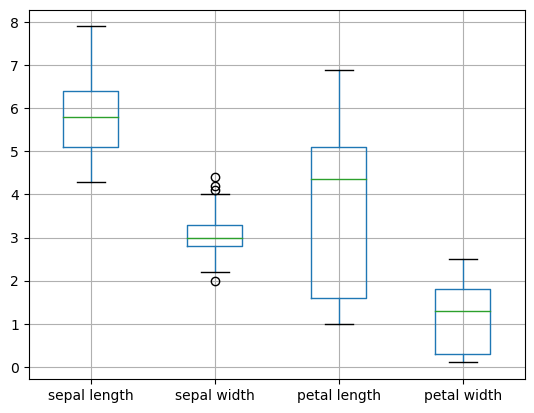

In [94]:
# show a boxplot of each numerical feature
data.boxplot()

<AxesSubplot:title={'center':'Line plot'}>

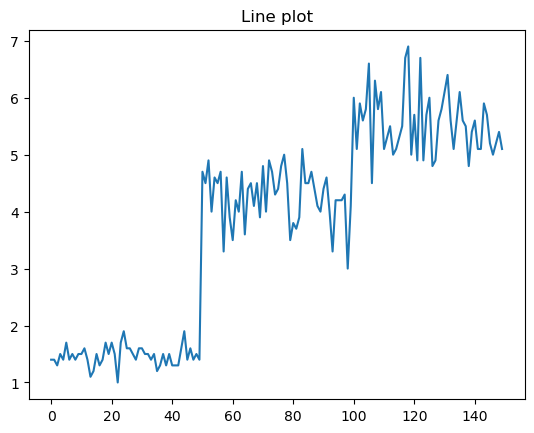

In [95]:
# create a line plot for one feature
petal_len = data['petal length']
petal_len.plot(kind='line', title='Line plot')

<AxesSubplot:>

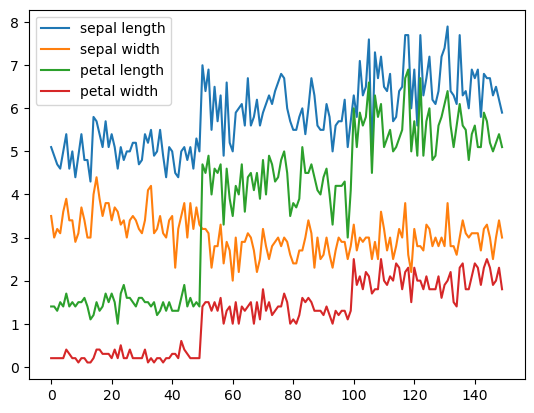

In [96]:
# create a line plot for all numeric features
data.plot()

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

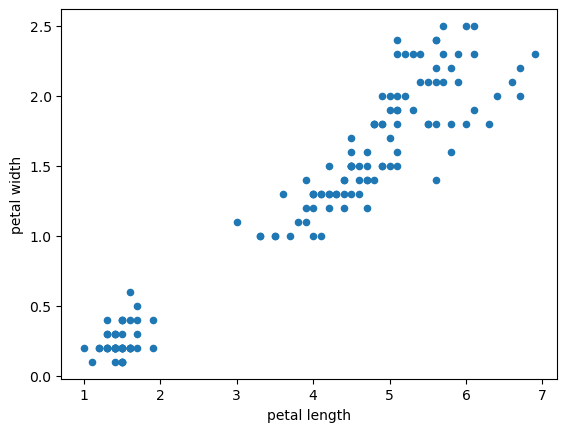

In [97]:
# create a scatter plot of 2 features
data.plot.scatter(x='petal length', y='petal width')

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

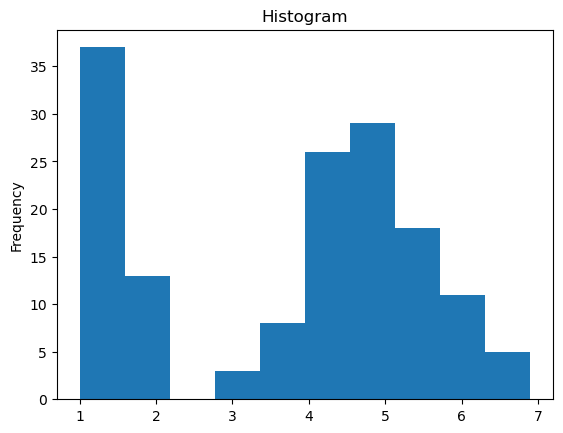

In [98]:
# show a histogram of one feature
petal_len.plot(kind='hist', title = 'Histogram')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<AxesSubplot:ylabel='None'>

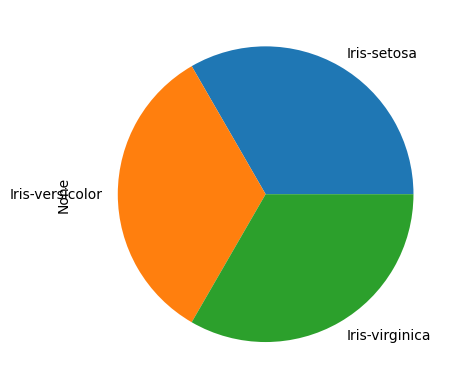

In [99]:
# create a pie chart
groups = data.groupby('class')
print(groups.size()) # groups.size() is a Series object
groups.size().plot.pie()

### 2.2 Using Matplotlib
Sometimes the built-in dataframe plotting methods are not customizable enough for what you are trying to show. The matplotlib package can be used to create more interesting plots.
The matplotlib documentation is [here](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes).

Let's plot the petal length vs the petal width of each data point and color each point according to its class label.

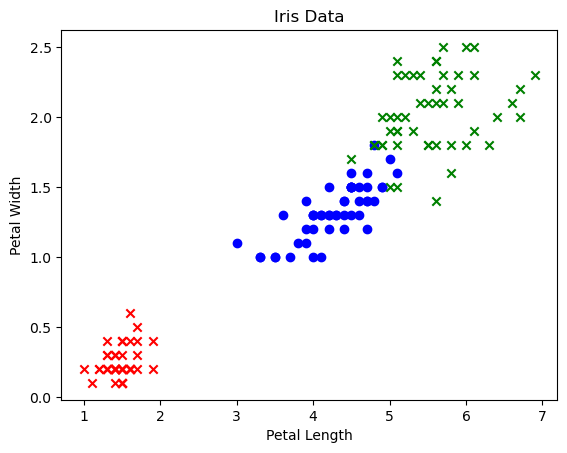

In [100]:
# separate the data by class labels
versicolor = data[data['class'] == 'Iris-versicolor']
virginica = data[data['class'] == 'Iris-virginica']
setosa = data[data['class'] == 'Iris-setosa']

# plot the versicolors in blue
plt.scatter(versicolor['petal length'], 
           versicolor['petal width'], 
           c='blue')

# plot the virginicas in green
plt.scatter(virginica['petal length'], 
           virginica['petal width'], 
           c='green', marker = 'x')

# plot the setosas in red
plt.scatter(setosa['petal length'], 
           setosa['petal width'], 
           c='red', marker = 'x')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Iris Data")
plt.show()

As an alternative to adding 3 separate data sets to the same plot, you could use a lambda function for setting the color by class label.

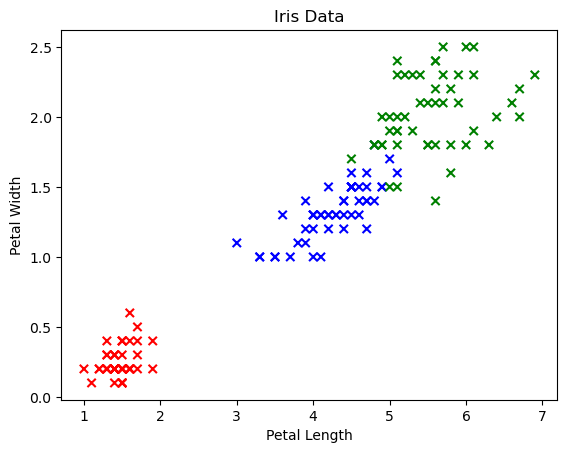

In [101]:
# plot petal length vs petal width, color data points by their class
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
plt.scatter(data['petal length'], 
           data['petal width'], 
           c=data['class'].apply(lambda x: colors[x]),
           marker = 'x')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Iris Data")
plt.show()

What can we tell about the 3 iris types by looking at this plot? We can see that the setosas have much smaller petal length & petal width than the other 2 types. The versicolors are in the middle in terms of petal length & width, and the virginicas have the largest petal lengths & widths. The versicolors and virginicas are more similar in size than the setosas. 

### 2.3 Scatter plot matrix
Matplotlib can create a quick scatter plot matrix to compare all of the numeric attributes against each other. You can quickly look for correlations between attributes this way. 

Down the diagonal is a histogram of each attribute.

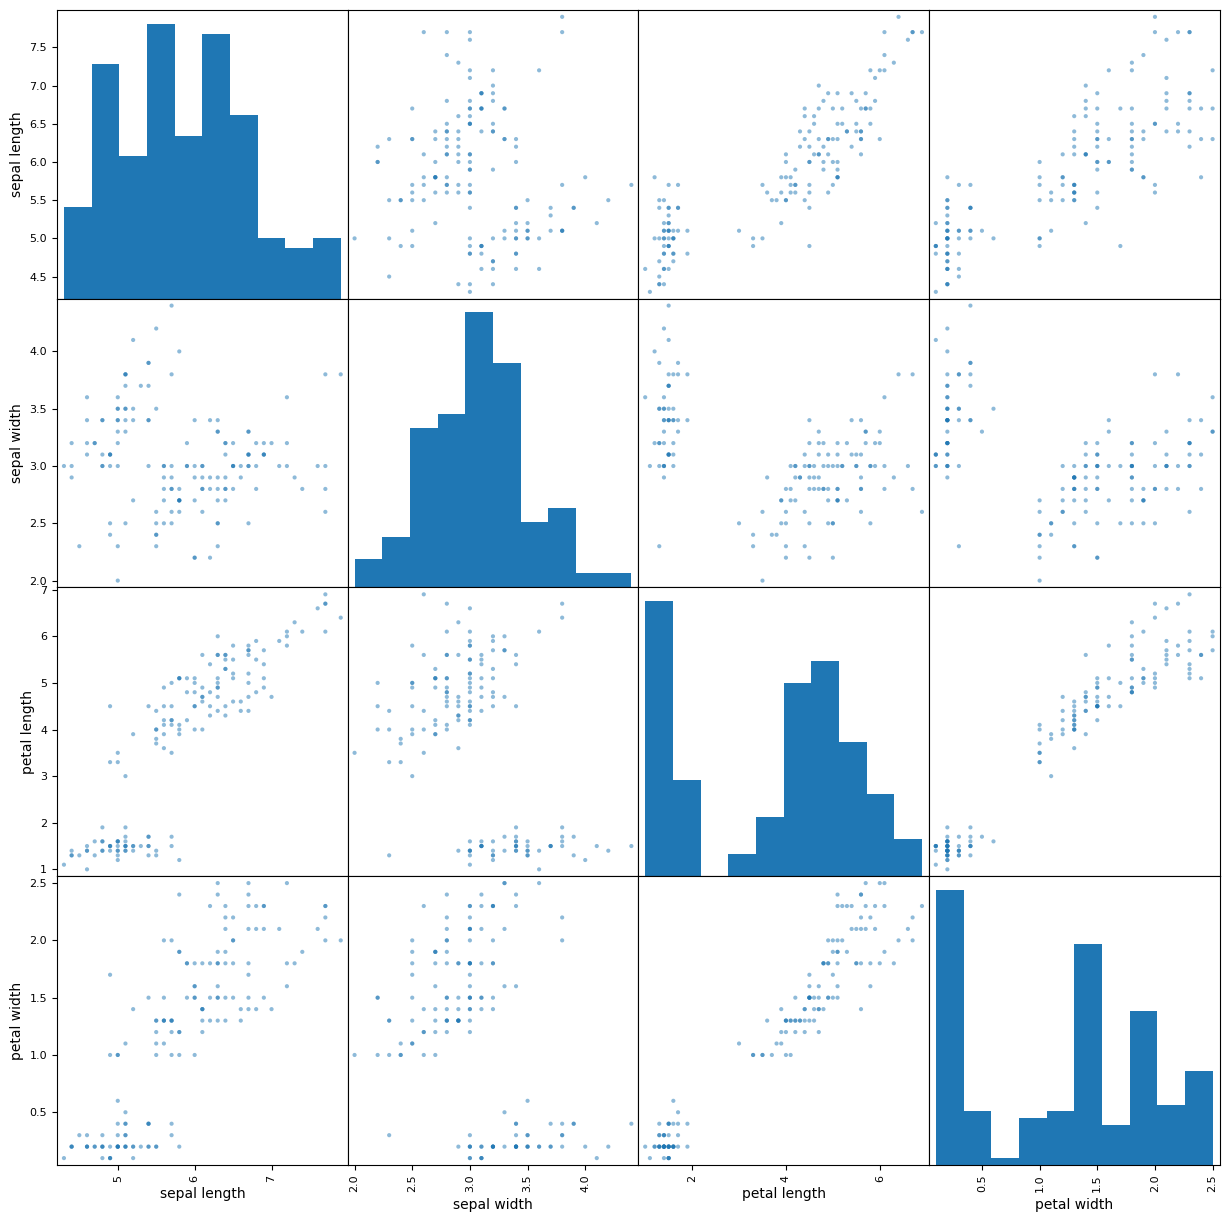

In [102]:
# scatter plot matrix
pd.plotting.scatter_matrix(data, figsize=(15,15))
plt.show()